In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
college = pd.read_csv("college_data.csv")
college.head()

,INSTNM,OPEID,REGION,SAT_AVG_ALL,PCTPELL,PCTFLOAN,ADM_RATE_ALL,UG,AVGFACSAL,COMPL_RPY_5YR_RT,...,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition,Degree_Type,Ownership,Regions,Locales,Locale_Short
0,Alabama A & M University,100200,5,850.0,0.7249,0.8159,0.653841,4380.0,7017.0,0.477631579,...,1,0.0,0.0,12.0,13435.0,Graduate,Public,South East,City: Midsize,City
1,University of Alabama at Birmingham,105200,5,1147.0,0.3505,0.5218,0.604275,10331.0,10221.0,0.673230442,...,1,0.0,0.0,12.0,16023.0,Graduate,Public,South East,City: Midsize,City
2,Amridge University,2503400,5,NaN,0.7455,0.8781,NaN,98.0,3217.0,0.636363636,...,2,0.0,0.0,12.0,8862.0,Graduate,Private non-profit,South East,City: Midsize,City
3,University of Alabama in Huntsville,105500,5,1221.0,0.3179,0.4589,0.811971,5220.0,9514.0,0.762222222,...,1,0.0,0.0,12.0,18661.0,Graduate,Public,South East,City: Midsize,City
4,Alabama State University,100500,5,844.0,0.7567,0.7692,0.463858,4348.0,7940.0,0.43006993,...,1,0.0,0.0,12.0,7400.0,Graduate,Public,South East,City: Midsize,City


## FacetGrid and FactorPlot (Catplot now) 

D:\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


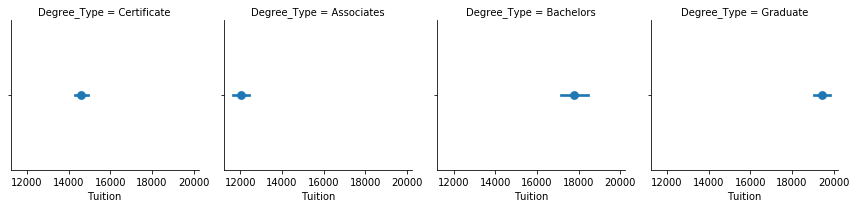

In [3]:
g = sns.FacetGrid(
    college,
    col="Degree_Type",
    col_order=["Certificate", "Associates", "Bachelors", "Graduate"],
)  # creating the facetgrid

g.map(sns.pointplot, "Tuition")  # mapping the pointplot onto the grid

plt.show()

The tuition cost goes as follows: Graduate > Bachelors > Certificate > Associates.

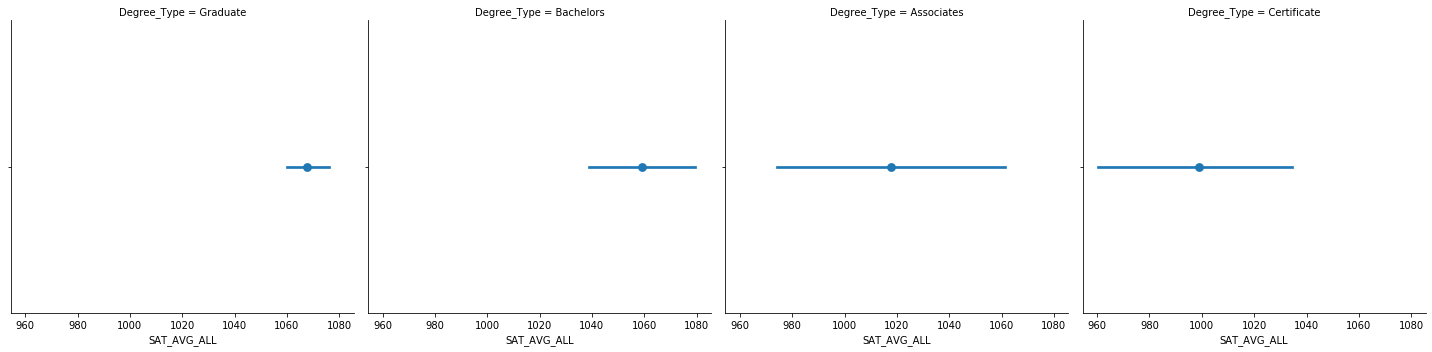

In [4]:
sns.catplot(
    data=college,
    x="SAT_AVG_ALL",
    kind="point",
    col="Degree_Type",
    col_order=["Graduate", "Bachelors", "Associates", "Certificate"],
)
plt.show()

Graduate and bachelor students tend to have higher average SAT scores.

### FacetGrid for Regression 

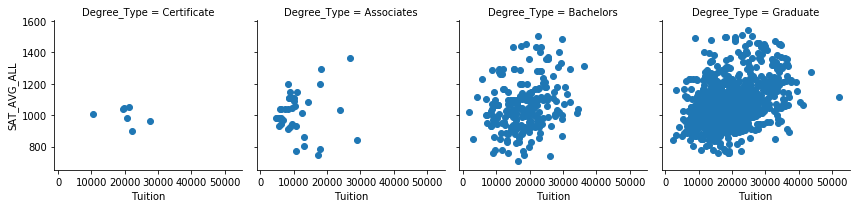

In [5]:
g = sns.FacetGrid(
    college,
    col="Degree_Type",
    col_order=["Certificate", "Associates", "Bachelors", "Graduate"],
)

g.map(plt.scatter, "Tuition", "SAT_AVG_ALL")

plt.show()

## lmplot 

Plots scatter and regression plots on a FacetGrid.

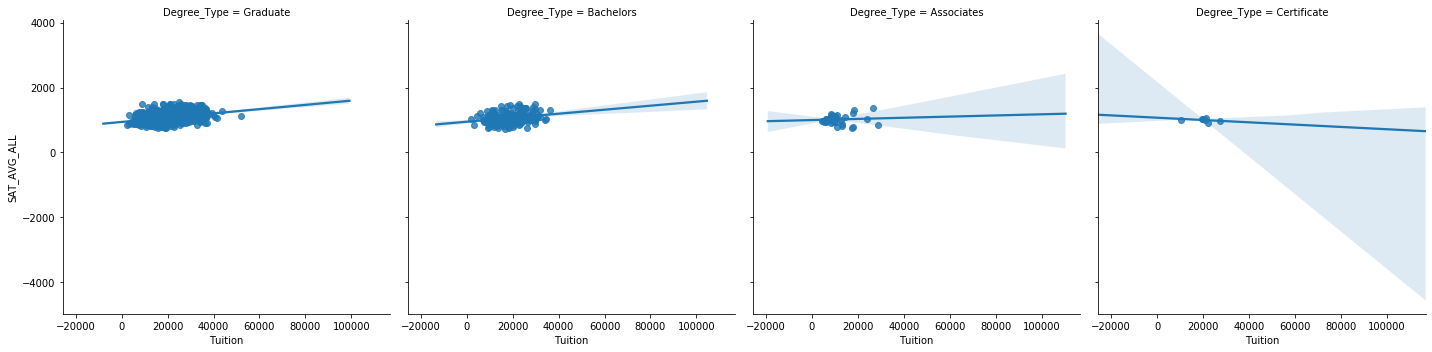

In [6]:
sns.lmplot(
    data=college,
    x="Tuition",
    y="SAT_AVG_ALL",
    col="Degree_Type",
    col_order=["Graduate", "Bachelors", "Associates", "Certificate"],
)
plt.show()

## Pairgrid & Pairplot 

In [8]:
insurance = pd.read_csv("vehicle_insurance.csv")
insurance.head()

,State,fatal_collisions,fatal_collisions_speeding,fatal_collisions_alc,fatal_collisions_not_distracted,fatal_collisions_no_hist,premiums,insurance_losses,Region
0,Alabama,18.8,39,30,96,80,784.55,145.08,South
1,Alaska,18.1,41,25,90,94,1053.48,133.93,West
2,Arizona,18.6,35,28,84,96,899.47,110.35,West
3,Arkansas,22.4,18,26,94,95,827.34,142.39,South
4,California,12.0,35,28,91,89,878.41,165.63,West


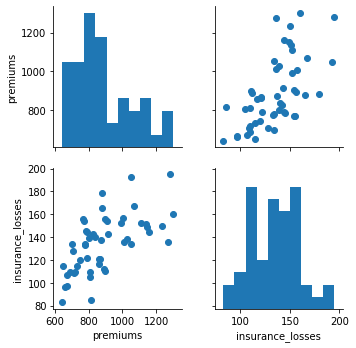

In [9]:
g = sns.PairGrid(insurance, vars=["premiums", "insurance_losses"])
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
plt.show()

In [10]:
np.corrcoef(insurance["premiums"], insurance["insurance_losses"])

array([[1.        , 0.62311644],
       [0.62311644, 1.        ]])

Premium amount and insurance losses are positively correlated with a R value of 0.62

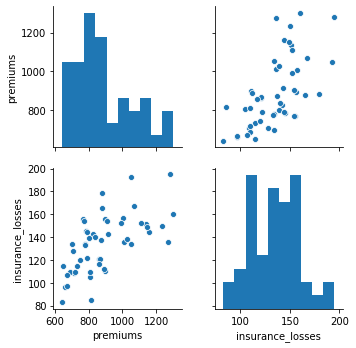

In [11]:
sns.pairplot(insurance, vars=["premiums", "insurance_losses"], kind="scatter")
plt.show()

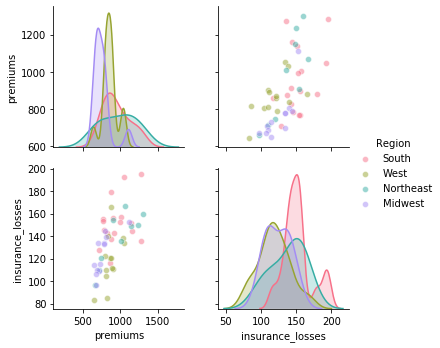

In [12]:
sns.pairplot(
    insurance,
    vars=["premiums", "insurance_losses"],
    kind="scatter",
    hue="Region",
    palette="husl",
    plot_kws={"alpha": 0.5},
)
plt.show()

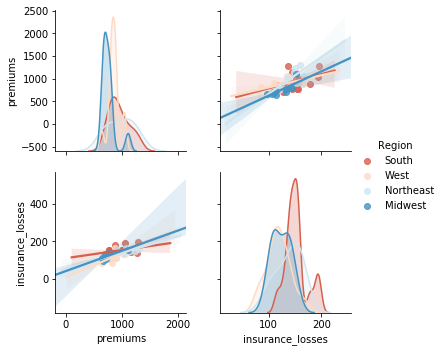

In [16]:
sns.pairplot(
    insurance,
    vars=["premiums", "insurance_losses"],
    kind="reg",
    diag_kind="kde",
    hue="Region",
    palette="RdBu",
)
plt.show()

The kind argument is used to specify the off-diagonal plots while diag_kind is used to specify the diagonal plots.

## JointGrid and Join plots 

In [17]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


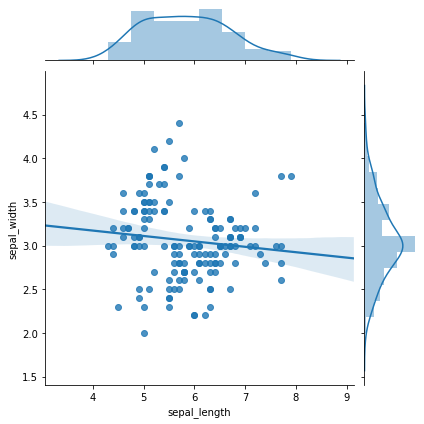

In [20]:
g = sns.JointGrid(x = 'sepal_length', y = 'sepal_width', data=iris)
g.plot(sns.regplot, sns.distplot)
plt.show()

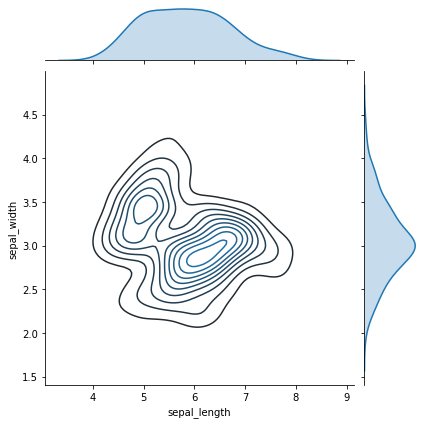

In [24]:
g = sns.JointGrid(x = 'sepal_length', y = 'sepal_width', data=iris)
g = g.plot_joint(sns.kdeplot)
g = g.plot_marginals(sns.kdeplot, shade = True)
plt.show()

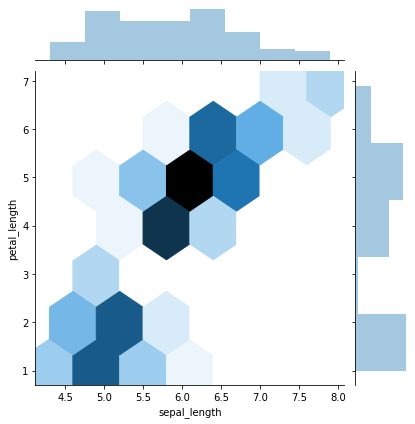

In [22]:
sns.jointplot(x = 'sepal_length', y = 'petal_length', data=iris, kind='hex')
plt.show()